# DSI-23 Capstone Project: Analysis on COVID-19 Pfizer/BioNtech Vaccine Tweets (Sentiment Analysis)

## Introduction

[COVID-19 is the disease caused by a new coronavirus called SARS-CoV-2](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/question-and-answers-hub/q-a-detail/coronavirus-disease-covid-19). The novel virus was first identified in Wuhan, China, in December 2019; it spread to other parts of mainland China and eventually around the world. The World Health Organization (WHO) declared a Public Health Emergency of International Concern on 30 January 2020, and a pandemic on 11 March 2020. 

Since 2021, variants of the virus have emerged or become dominant in many countries, with the Delta, Alpha and Beta variants being the most virulent. As of 31 August 2021, more than 217 million cases and 4.51 million deaths have been confirmed, making it one of the deadliest pandemics in history. 

The first mass vaccination programme started in early December 2020. The Pfizer/BioNtech vaccine was the first to be listed for WHO Emergency Use Listing (EUL) on 31 December 2020.

Due to the extensive data available on the Pfizer/BioNtech vaccine (compared to other vaccines), this project looks to analyze tweets about the Pfizer/BioNtech vaccine, mainly on the following:
1. Sentiment analysis on the Pfizer/BioNtech vaccine tweets, to understand the overall global sentiment. 
2. Topic modelling within each sentiment, to further understand the possible reasons behind the sentiment. 

## Problem Statement

Through analyzing tweets on the COVID-19 Pfizer/BioNtech vaccine, this project aims to understand the overall global sentiment across time on the Pfizer/BioNtech vaccine. In addition to the sentiment analysis, topic modelling will be explored to further break down the discussion topics within each sentiment group. The goal is to identify potential interventions for Pfizer/BioNtech to take, in order to speed up the global vaccination progress.

## Data Dictionary

The datasets involved in this project are as follows. 

|Dataset|Description|
|:---|:---|
|[`vaccination_all_tweets.csv`](../assets/vaccination_all_tweets.csv)|The original dataset retrieved from [Kaggle](https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets/metadata) (version 90), containing tweets about all COVID-19 vaccines.| 
|[`pfizer_tweets.csv`](../assets/pfizer_tweets.csv)|Dataset containing tweets about the Pfizer vaccine, after performing sentiment analysis.| 


|Feature|Type|Description|
|:---|:---:|:---|
|user_name|*str*|User name of the Twitter account.| 
|user_location|*str*|User location of the Twitter account.| 
|user_description|*str*|User description of the Twitter account.| 
|user_created|*date*|Date when the Twitter account was created.| 
|user_followers|*int*|Number of the followers of the Twitter account.| 
|user_verified|*bool*|Verification status of the Twitter account (True/False).| 
|date|*date*|Date when the tweet was posted.| 
|text|*str*|Content of the tweet.| 
|hashtags|*list*|Hashtags used in the tweet.| 
|source|*str*|Source / device where the tweet came from.| 
|retweets|*int*|Number of retweets of the tweet.| 
|favorites|*int*|Number of favorties (equivalent to likes) of the tweet.| 
|is_retweet|*bool*|Whether the tweet is a retweet (True/False) | 
|sentiment|*str*|The sentiment category of the tweet (Positive/Neutral/Negative)| 


### Contents:
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [Sentiment Analysis (VADER)](#Sentiment-Analysis-(VADER))
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
- [Cross-Sentiment Comparisons](#Cross-Sentiment-Comparisons)


## Data Import & Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
import plotly.io as pio
#set 'svg' as default renderer to show plots on git, 'notebook' for interactive mode on jupyter notebook
pio.renderers.default = "svg" 
%matplotlib inline

import re
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [2]:
%%html
<style>
table {float: left}
</style>

In [3]:
#https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets/metadata VERSION 90
#dataset consists of tweets about various covid19 vaccines
data = pd.read_csv('../data/vaccination_all_tweets.csv')

In [4]:
#filtering for tweets that contain 'pfizer'
data['text'] = data['text'].str.lower()
data = data[data['text'].str.contains('pfizer')]

In [5]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,False,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,False,2020-12-12 20:33:45,#coronavirus #sputnikv #astrazeneca #pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
2,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,False,2020-12-12 20:17:19,explain to me again why we need a vaccine @bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
3,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,False,2020-12-12 20:01:16,covid vaccine; you getting it?\n\n #covidvacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
4,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                17172 non-null  int64 
 1   user_name         17172 non-null  object
 2   user_location     12969 non-null  object
 3   user_description  15900 non-null  object
 4   user_created      17172 non-null  object
 5   user_followers    17172 non-null  int64 
 6   user_verified     17172 non-null  bool  
 7   date              17172 non-null  object
 8   text              17172 non-null  object
 9   hashtags          15740 non-null  object
 10  source            17170 non-null  object
 11  retweets          17172 non-null  int64 
 12  favorites         17172 non-null  int64 
 13  is_retweet        17172 non-null  bool  
dtypes: bool(2), int64(4), object(8)
memory usage: 1.6+ MB


In [7]:
data.isnull().sum().sort_values(ascending=False)

user_location       4203
hashtags            1432
user_description    1272
source                 2
id                     0
user_name              0
user_created           0
user_followers         0
user_verified          0
date                   0
text                   0
retweets               0
favorites              0
is_retweet             0
dtype: int64

## Sentiment Analysis (VADER)

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is sensitive to both polarity and intensity of emotions within human text, [specifically attuned to sentiments expressed in social media](https://github.com/cjhutto/vaderSentiment). 



### Text Preprocessing

[VADER does not require much preprocessing](https://towardsdatascience.com/an-short-introduction-to-vader-3f3860208d53) - it is smart enough to understand the valence of non-conventional text, including emojis, capitalization (sad vs SAD) and extended punctuation (! vs !!!).

Common preprocessing efforts will actually hinder VADER. As such, text preprocessing will only focus on removing twitter handlers, hashtags, and links.

In [8]:
#tweet samples BEFORE preprocessing
print(data.iloc[2,8])
print(data.iloc[17,8])

explain to me again why we need a vaccine @borisjohnson @matthancock #whereareallthesickpeople #pfizerbiontech… https://t.co/kxbsrobehq
vaccine!! anyone?? #covid #pfizervaccine #pfizerbiontech https://t.co/b9zkwnlikx


In [9]:
#remove hashtags and twitter handlers
data.text = data.text.apply(lambda x:re.sub(r'@|#','',x))

#remove URLS
data.text = data.text.apply(lambda x:re.sub(r'http\S+', '', x))

#substituting multiple spaces with single space
data.text = data.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [10]:
#tweet samples AFTER preprocessing
print(data.iloc[2,8])
print(data.iloc[17,8])

explain to me again why we need a vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech… 
vaccine!! anyone?? covid pfizervaccine pfizerbiontech 


### Sentiment Analysis

In [11]:
def vader_sentiment(s):
    sia = SIA()
    pol_score = sia.polarity_scores(s['text'])
    return s.append(pd.Series(list(pol_score.values()), index=pol_score.keys()))

In [12]:
data = data.apply(vader_sentiment, axis=1)

In [13]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,neg,neu,pos,compound
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,False,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.0,0.769,0.231,0.4019
1,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.0,0.867,0.133,0.2500
2,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,False,2020-12-12 20:17:19,explain to me again why we need a vaccine bori...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.0,1.000,0.000,0.0000
3,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,False,2020-12-12 20:01:16,covid vaccine; you getting it? covidvaccine co...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False,0.0,1.000,0.000,0.0000
4,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,0.0,1.000,0.000,0.0000


In [14]:
data.iloc[:,-4:].describe()

,neg,neu,pos,compound
count,17172.000000,17172.000000,17172.000000,17172.000000
mean,0.040339,0.882186,0.077474,0.086403
std,0.084075,0.131891,0.113819,0.339449
min,0.000000,0.209000,0.000000,-0.929400
25%,0.000000,0.795000,0.000000,0.000000
50%,0.000000,0.895000,0.000000,0.000000
75%,0.000000,1.000000,0.149000,0.361200
max,0.661000,1.000000,0.750000,0.940300


In [15]:
#grouping sentiment scores into positive / neutral / negative
thresholds = [
    (data['compound'] >= 0.05),
    (data['compound'] > -0.05) & (data['compound'] < 0.05),
    (data['compound'] <= -0.05)]
category = ['Positive', 'Neutral', 'Negative']
data['sentiment'] = np.select(thresholds, category)

Below are the [standardized thresholds](https://github.com/cjhutto/vaderSentiment#about-the-scoring) for classifying a text document as positive, neutral, or negative sentiment in VADER.

    positive sentiment: compound score >= 0.05
    neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
    negative sentiment: compound score <= -0.05


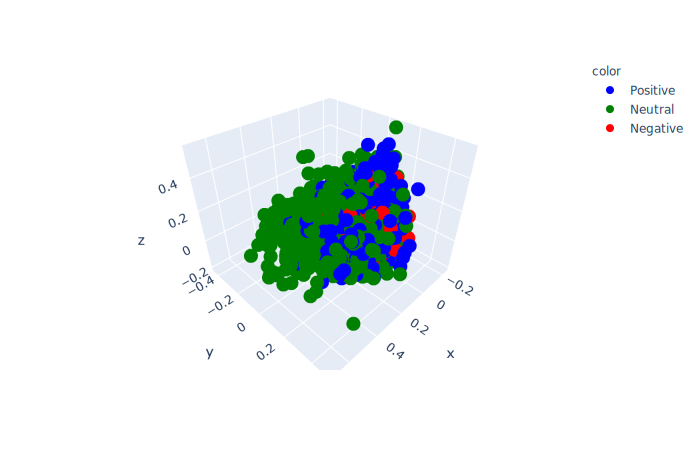

In [16]:
#visualize the sentiment clusters
tf_data=TfidfVectorizer()
vader_data = tf_data.fit_transform(data['text'].values)
pca = PCA(n_components=3).fit_transform(vader_data.todense())
fig = px.scatter_3d(x=pca[:,0],y=pca[:,1],z=pca[:,2],color=data['sentiment'].values,color_discrete_sequence=["blue", "green", "red"])
fig.show()
fig.write_html("../visuals/3d_pca_cluster.html")

The 3 clusters do not seem very distinct from one another - they are largely mixed up together. This is rather concerning, but also understandable because the distinctions between sentiments are typically not straightforward. 

The true sentiment of a tweet depends on the intent of the author behind it, thus sentiment classification becomes a highly subjective task. However, it is important to acknowledge that VADER is not foolproof and sometimes the sentiment generated by VADER may seem highly questionable.

In [17]:
data.drop(columns=['neg','neu','pos'], inplace=True)
data.to_csv('../data/pfizer_tweets.csv', index=False)

## Exploratory Data Analysis (EDA)

In [18]:
#view sentiment distribution
data.groupby('sentiment').count()['text'].reset_index()

,sentiment,text
0,Negative,3081
1,Neutral,8147
2,Positive,5944


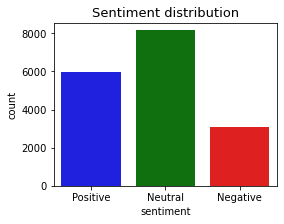

In [19]:
plt.subplots(figsize=(4,3))
sns.countplot(x='sentiment', data=data, palette = ['b', 'g','r'])
plt.title("Sentiment distribution",fontsize=13)
plt.show()

Overall, most tweets on the Pfizer vaccine had neutral sentiment, followed by positive and lastly negative.

### Time Analysis

In [20]:
#check date range of tweets
data.sort_values('date')['date'].unique()

array(['2020-12-12 11:55:28', '2020-12-12 12:12:35',
       '2020-12-12 12:16:14', ..., '2021-08-22 11:17:34',
       '2021-08-22 11:19:46', '2021-08-22 12:29:17'], dtype=object)

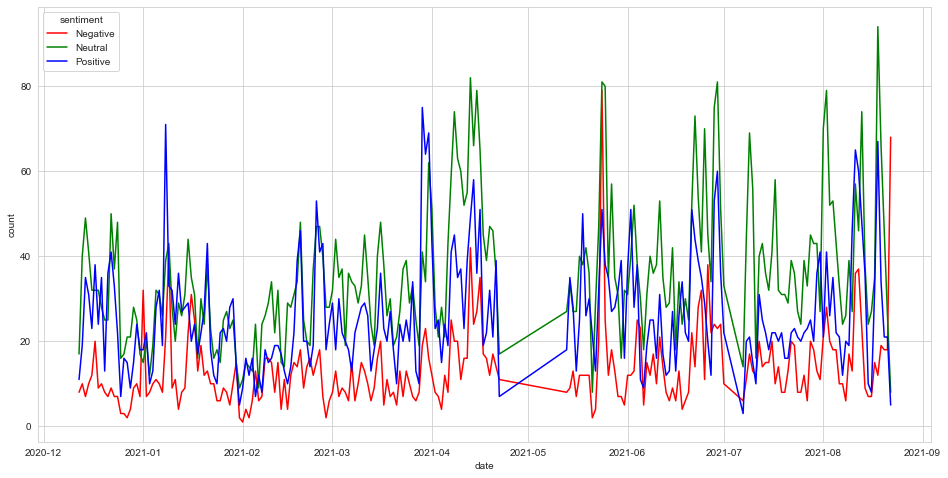

In [21]:
#visualize sentiment over time
plt.figure(figsize=(16,8))
data["date"] = pd.to_datetime(data.date) 
timeline = data.resample('D', on='date')["sentiment"].value_counts().unstack(1)

timeline.reset_index(inplace=True)

timeline = timeline.melt("date", var_name='sentiment',  value_name='count')

sns.set_style("whitegrid")
sns.lineplot(x="date", y="count", hue="sentiment", data=timeline, palette=["r", "g","b"])
plt.show()

The data consists of tweets from December 2020 til August 2021.

In the initial stages up to February 2021, the number of positive, neutral, and negative tweets often overlapped with one another, perhaps due to mixed opinions of the newly launched vaccine.

Afterwards, the neutral tweets took the top spot, followed by positive and negative - this pattern remained fairly consistent til May 2021. In the latter half of May 2021, there was a huge spike in negative tweets. This is highly likely due to the emergence of the Delta variant outbreak in India.

Lastly, towards the end of August 2021, there was another spike in negative tweets. This was largely due to discussions about how Pfizer is less effective against the Delta variant. 

Coincidentally, the last collected tweet was on 22 August 2021. Though unrelated to the delta variant, the Pfizer vaccine received FDA's approval on 23 August 2021. It would be interesting to see how online sentiment develops further.

### User Locations

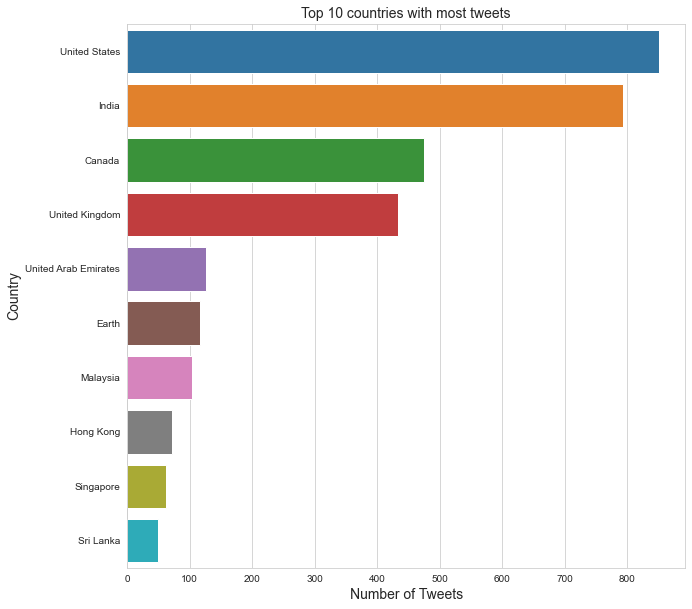

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x=data["user_location"].value_counts().values[0:10],
            y=data["user_location"].value_counts().index[0:10]);
plt.title("Top 10 countries with most tweets",fontsize=14)
plt.xlabel("Number of Tweets",fontsize=14)
plt.ylabel("Country",fontsize=14)
plt.show()

Above are the countries with most tweets. There is 25% missing data for user locations, as it is not mandatory for Twitter users to fill in the location information. In addition, the location information is not a drop-down selection, and users are able to freely type in their locations. As a result, there are many variations in how users specify their locations, thus the location data is not standardized. I have grouped the top occurrences to the country-level for a more accurate representation.

### World Cloud

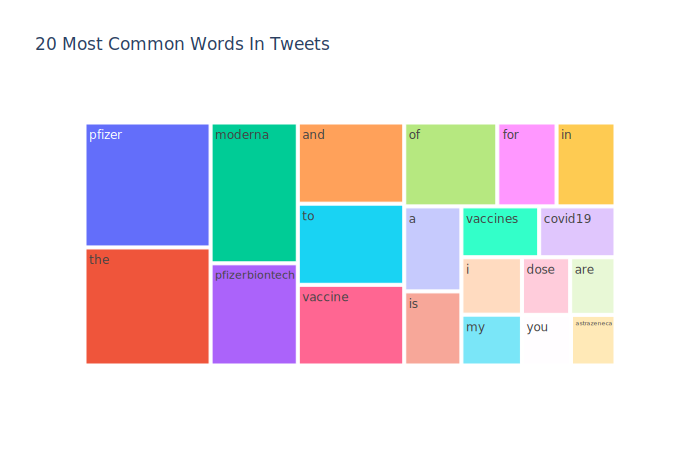

In [23]:
all_words=[]
data['text_split'] = data['text'].str.split()
for i in range(len(data['text_split'])):
    a=data['text_split'][i]
    for i in a:
        all_words.append(i)
all_words=pd.Series(np.array(all_words))

common_words=all_words.value_counts()[:20].rename_axis('Common Words').reset_index(name='count')

fig = px.treemap(common_words, path=['Common Words'], values='count',title='20 Most Common Words In Tweets')
fig.show()

There are 6647 instances of tweets in which No Hashtags were used


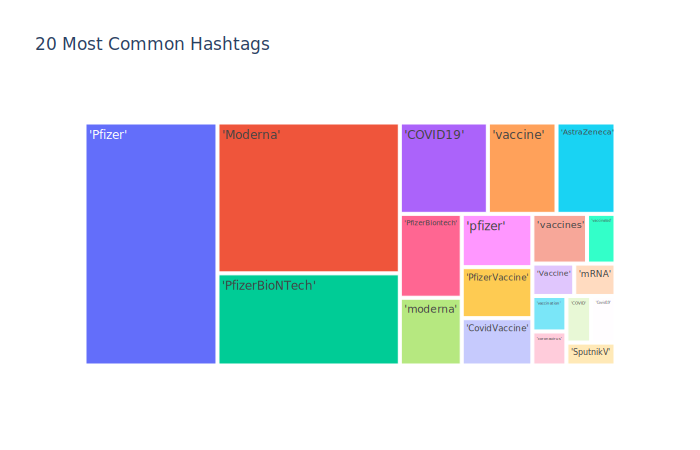

In [24]:
#plot most common hashtags
data['hashtags']=data['hashtags'].fillna('[]')
all_hashtags=[]
for i in range(len(data['hashtags'])):
    j=data['hashtags'][i].strip('][').split(', ') 
    for i in j:
        all_hashtags.append(i)
all_hashtags=['No Hashtag' if x=='' else x for x in all_hashtags]       

all_hashtags=pd.Series(np.array(all_hashtags))
print('There are {} instances of tweets in which No Hashtags were used'.format(all_hashtags.value_counts()[1]))

common_hashtags=all_hashtags.value_counts().drop(labels='No Hashtag')[:20].rename_axis('Common Hashtags').reset_index(name='count')
fig = px.treemap(common_hashtags, path=['Common Hashtags'], values='count',title='20 Most Common Hashtags')
fig.show()

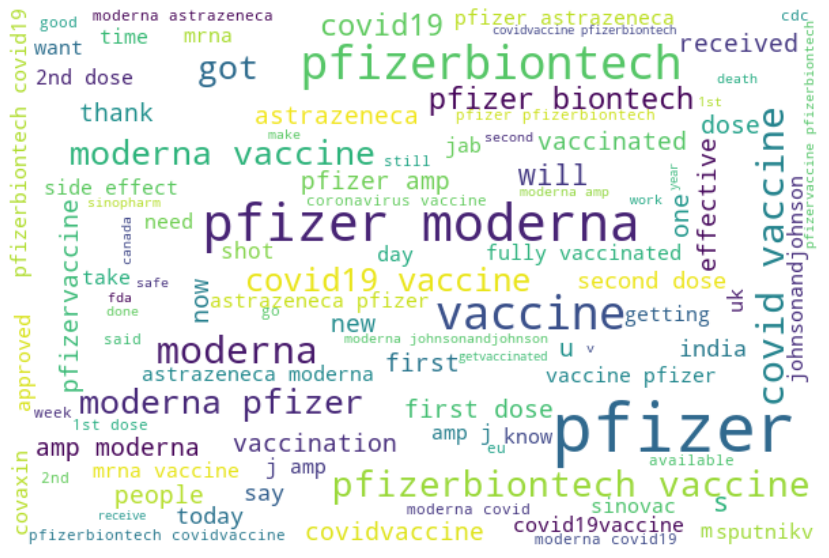

In [25]:
tweets = " ".join(tweet for tweet in data.text)

# Create and generate a word cloud image:
wordcloud = WordCloud(width=600, height=400, max_font_size=50, max_words=100, stopwords=STOPWORDS, background_color="white").generate(tweets)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Above are visualizations of the most common words and hashtags. For the most common words, the tree map shows many stopwords such as 'and', 'the', etc. This is because text preprocessing was not required for VADER. Naturally, these words will appear frequently. As such, on top of a tree map, I plotted a word cloud as a second option.

As seen in the word cloud, there are many other COVID-19 vaccines being mentioned in the tweets. We can infer that people were making comparisons between the vaccines. 

In addition, we see words like 'side effect', 'received', '1st dose', '2nd dose', etc. From these, we can infer that many discussions revolved around experiences of taking the vaccine.

### Verified Users

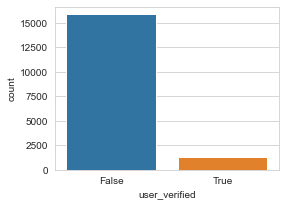

In [26]:
#count verified vs non verified
plt.subplots(figsize=(4,3))
sns.countplot(data=data, x='user_verified')
plt.show()

In [27]:
#preview some of the verified users
verified = data[['user_name','user_location','user_description','user_followers','user_verified']]
verified[verified['user_verified']==True].head(15)

,user_name,user_location,user_description,user_followers,user_verified
6,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",21924,True
8,ILKHA,Türkiye,Official Twitter account of Ilke News Agency /,4056,True
11,BOOM Live,India,IFCN certified fact-driven journalism. India's...,64185,True
25,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in En...,278080,True
29,Iran International English,United Kingdom,The first 24/7 hours Persian News Channel | Of...,17943,True
47,Genevieve Reaume,"Oregon, USA",Emmy-award winning @KATUnews reporter • shooti...,4276,True
49,KFDM News,"Beaumont, Texas",Providing news our viewers have been counting ...,20014,True
55,Evan Webeck,Oakland,S̶p̶o̶r̶t̶s̶ coronavirus reporter for @mercnew...,1296,True
62,IANS Tweets,India,India's largest independent News Agency,59733,True
63,Maryam Monsef,NaN,MP for Peterborough-Kawartha. Minister for Wom...,46723,True


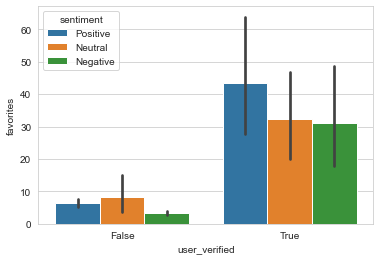

In [28]:
#number of tweet favorites between verified vs non verified
sns.barplot(x="user_verified", y="favorites", hue="sentiment", data=data)
plt.show()

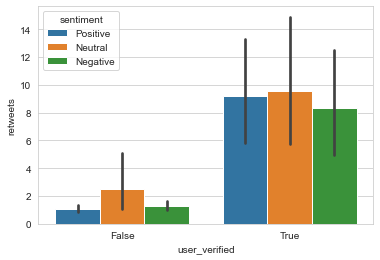

In [29]:
#number of retweets between verified vs non verified
sns.barplot(x="user_verified", y="retweets", hue="sentiment", data=data)
plt.show()

Favorites and retweets are measures of engagement on Twitter. Verified users typically have a large following, and we are interested to see the engagement in the tweets from these verified users.

It seems that positive tweets are receiving more favorites overall (~30% higher). This is a good thing because it means that the verified users are influencing people positively.

### Source (Device)

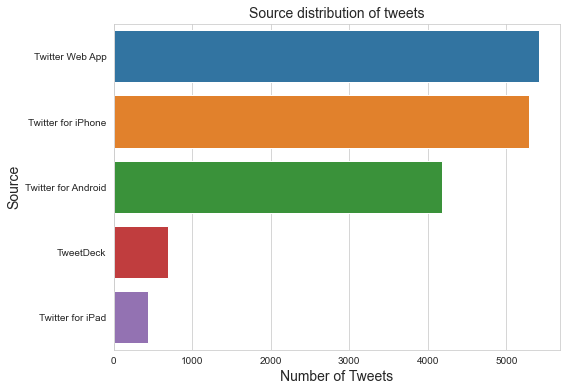

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x=data["source"].value_counts().values[0:5],
            y=data["source"].value_counts().index[0:5]);
plt.title("Source distribution of tweets",fontsize=14)
plt.xlabel("Number of Tweets",fontsize=14)
plt.ylabel("Source",fontsize=14)
plt.show()

Above is a visualization of where the tweets came from - this isn't much of interest to the analysis, however it's good to know that we are capturing users from various sources.

## Cross-Sentiment Comparisons

In [31]:
Positive_tweets = data[data['sentiment']=='Positive'].reset_index(drop=True)
Negative_tweets = data[data['sentiment']=='Negative'].reset_index(drop=True)
Neutral_tweets = data[data['sentiment']=='Neutral'].reset_index(drop=True)
pos_location=Positive_tweets['user_location']
neu_location=Neutral_tweets['user_location']
neg_location=Negative_tweets['user_location']

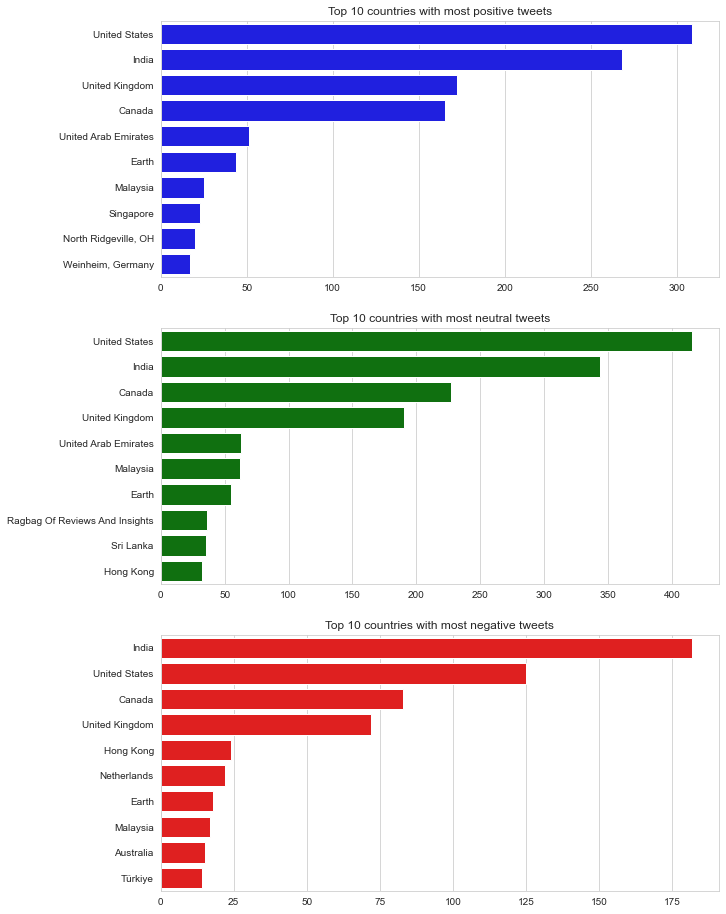

In [32]:
#visualize top countries between sentiments
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 16))

sns.barplot(x=pos_location.value_counts().values[0:10], y=pos_location.value_counts().index[0:10], orient="h", ax=ax1, palette=["b"])
ax1.set_title('Top 10 countries with most positive tweets')

sns.barplot(x=neu_location.value_counts().values[0:10], y=neu_location.value_counts().index[0:10], orient="h", ax=ax2, palette=["g"])
ax2.set_title('Top 10 countries with most neutral tweets')

sns.barplot(x=neg_location.value_counts().values[0:10], y=neg_location.value_counts().index[0:10], orient="h", ax=ax3, palette=["r"])
ax3.set_title('Top 10 countries with most negative tweets')

plt.show()

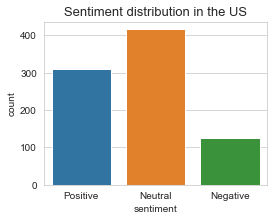

In [33]:
#sentiment distribution in the US
plt.subplots(figsize=(4,3))
sns.countplot(x='sentiment', data=data[data['user_location']=='United States'], order = ['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment distribution in the US",fontsize=13)
plt.show()

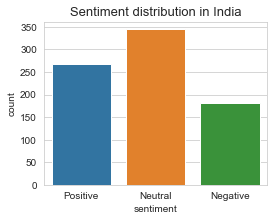

In [34]:
#sentiment distribution in India
plt.subplots(figsize=(4,3))
sns.countplot(x='sentiment', data=data[data['user_location']=='India'], order = ['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment distribution in India",fontsize=13)
plt.show()

The top countries in all sentiments are very similar. In general, the countries with high tweet count will take the top spots. Having plotted out the sentiment distributions in the US and India, we see that sentiments within countries are typically evenly spread out. It is unsurprising that people within a country have mixed opinions on the Pfizer vaccine (or any vaccine).

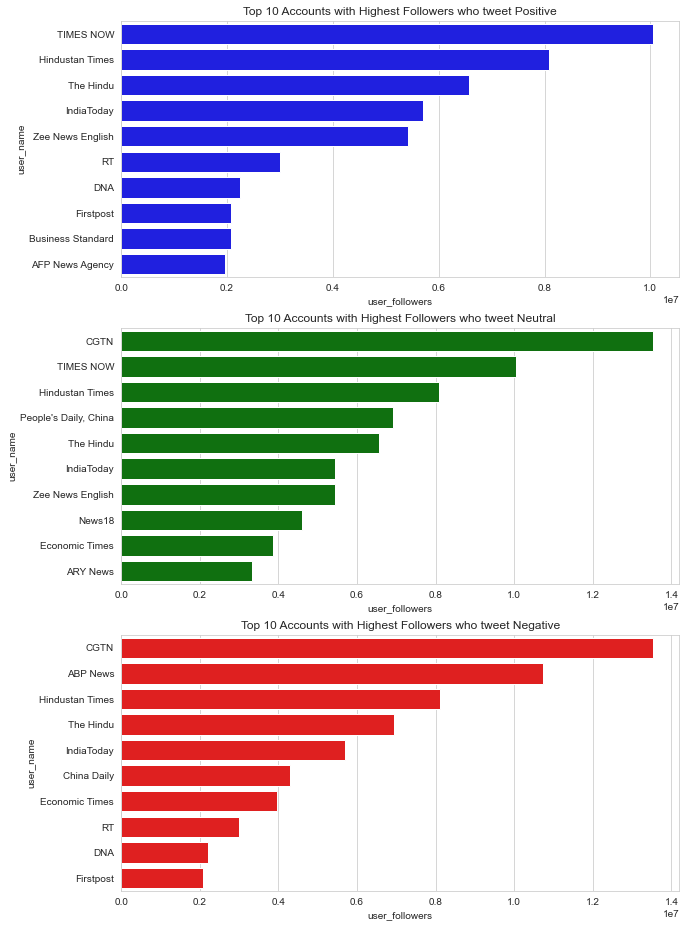

In [35]:
#visualize accounts with highest followers between sentiments
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 16))
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax1, palette=["b"],
           data=data[(data.sentiment== "Positive")]\
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax1.set_title('Top 10 Accounts with Highest Followers who tweet Positive')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax2, palette=["g"],
           data=data[(data.sentiment == "Neutral")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax2.set_title('Top 10 Accounts with Highest Followers who tweet Neutral')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax3, palette=["r"],
           data=data[(data.sentiment == "Negative")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax3.set_title('Top 10 Accounts with Highest Followers who tweet Negative')

plt.show()

There isn't much insight to see from the top accounts with highest followers. These accounts are mostly news channels - and news channels are expected to tweet about all positive, neutral, and negative news.